# Splay experiment report

Report for Data Structures 1 (NTIN066)

Author: Zdeněk Tomis (78002598)  
Seed: 98   

The report is in form of a notebook, so code. First, I load the data, then, I go case by case through the tests and plot the results, analyze them and form a hypothesis.

## Loading data

In [1]:
import os
import pandas as pd


def get_result_data(case, tree, out_path="out"):
    filename = f"t-{case}-{tree}"
    filepath = os.path.join(out_path, filename)
    cols = ["n", "subset_size", "rot_per_op"] if case == "subset" else ["n", "rot_per_op"]
    return pd.read_csv(filepath, sep=" ", header=None, names=cols)


sequential_std_df = get_result_data("sequential", "std")
sequential_naive_df = get_result_data("sequential", "naive")
random_std_df = get_result_data("random", "std")
random_naive_df = get_result_data("random", "naive")
subset_std_df = get_result_data("subset", "std")
subset_naive_df = get_result_data("subset", "naive")


## Sequential test

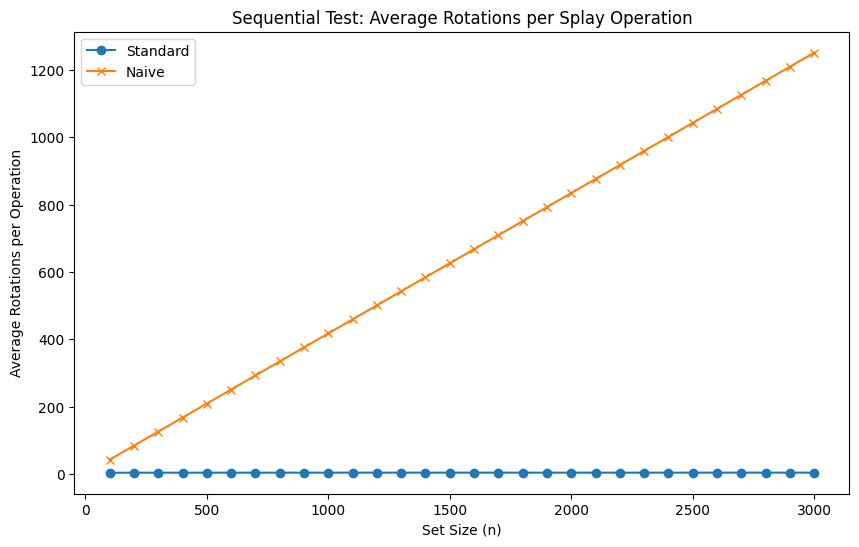

In [2]:
import matplotlib.pyplot as plt

def plot_sequential_test(std_df, naive_df):
    plt.figure(figsize=(10, 6))
    plt.plot(std_df["n"], std_df["rot_per_op"], label="Standard", marker="o")
    plt.plot(naive_df["n"], naive_df["rot_per_op"], label="Naive", marker="x")

    plt.xlabel("Set Size (n)")
    plt.ylabel("Average Rotations per Operation")
    plt.title("Sequential Test: Average Rotations per Splay Operation")
    plt.legend()
    plt.show()


plot_sequential_test(sequential_std_df, sequential_naive_df)





In this experiment, we sequentially inserted `n` elements into the splay tree and then repeatedly searched for each element in sequential order.

### Observations

The resulting graph highlights a significant difference between the `standard` and `naive` splay tree implementations during the experiment.

**Naive Implementation**: The average number of rotations per operation increases linearly with the number of nodes. This linear growth indicates that the naive implementation struggles with balancing the tree when elements are inserted in order, leading to inefficient performance.
  
**Standard Implementation**: The average number of rotations per operation remains low, regardless of the number of nodes. This  demonstrates that the standard implementation effectively self-balances the tree during sequential inserts.

### Conclusion

The `standard` splay tree implementation is significantly more efficient for ordered input sequences. 

## Random test

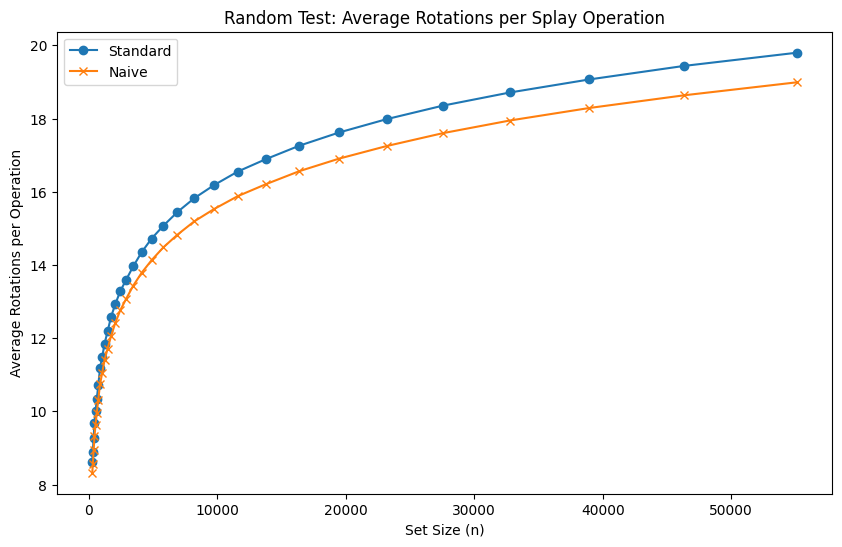

In [3]:

def plot_random_test(std_df, naive_df):
    plt.figure(figsize=(10, 6))
    plt.plot(std_df["n"], std_df["rot_per_op"], label="Standard", marker="o")
    plt.plot(naive_df["n"], naive_df["rot_per_op"], label="Naive", marker="x")
    plt.xlabel("Set Size (n)")
    plt.ylabel("Average Rotations per Operation")
    plt.title("Random Test: Average Rotations per Splay Operation")
    plt.legend()
    plt.show()


plot_random_test(random_std_df, random_naive_df)


Insert `n` elements in random order and then perform `5n` random lookups.

### Results

The plot illustrates how the `standard` and `naive` splay tree implementations perform under random insertions and accesses

### Observations

Both implementations show an increase in the average number of rotations as the number of nodes grows, though the rate of increase appears to slow down for larger trees, suggesting a log trend. In all sizes, the `naive` implementation consistently requires fewer rotations than the `standard` implementation.

For random access patterns, the `naive` implementation is more rotation-efficient than the `standard` implementation. This is likely because the `standard` implementation performs additional rotations to keep the tree balanced, which isn’t as beneficial with random data. The `naive` approach, focused solely on splaying, performs rotations faster and thus achieves better efficiency in this scenario.

## Subset test

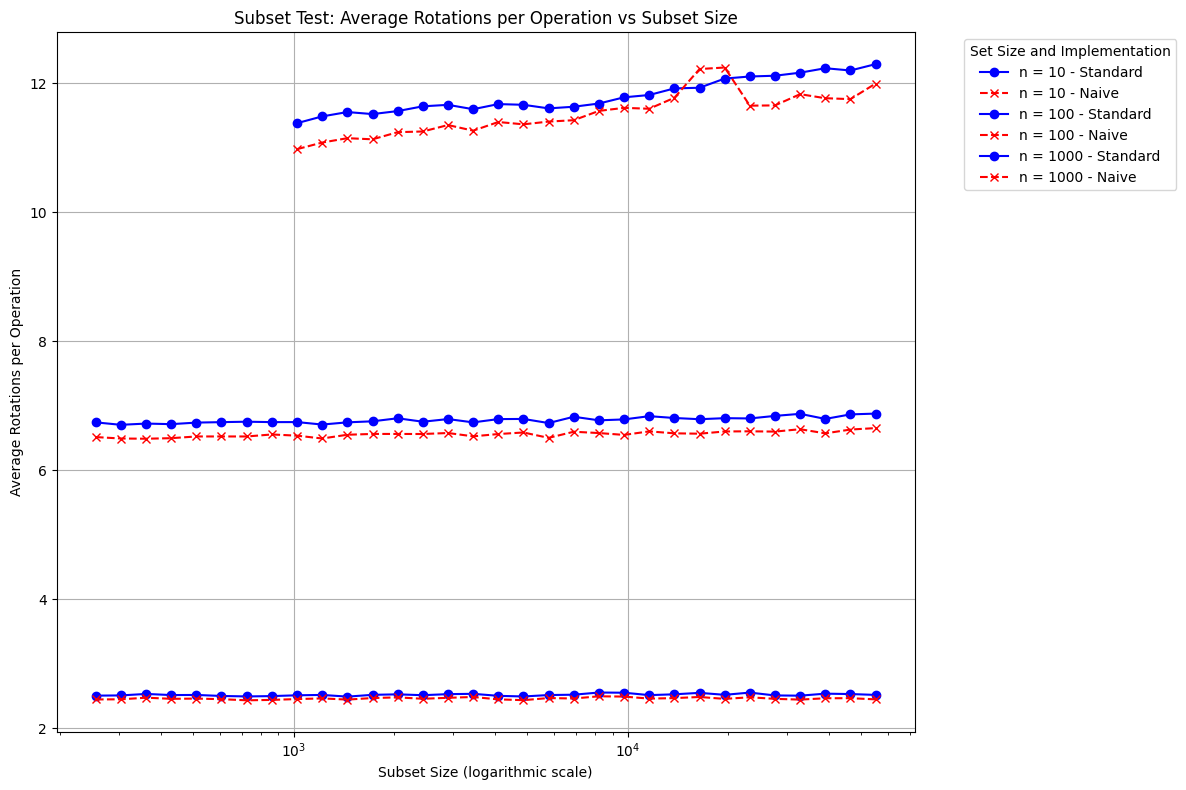

In [4]:
def plot_subset_test(std_df, naive_df):
    """Plot the subset test results with x-axis as 'subset_size' and y-axis as 'rot_per_op'.

    Grouped by set size 'n'. Each 'n' will have two lines (standard and naive implementations)
    with different colors or markers.
    """
    import matplotlib.pyplot as plt

    # Combine the dataframes and add an 'Implementation' column
    std_df = std_df.copy()
    naive_df = naive_df.copy()
    std_df['Implementation'] = 'Standard'
    naive_df['Implementation'] = 'Naive'
    combined_df = pd.concat([std_df, naive_df])

    # Get unique 'n' values to group by
    n_values = sorted(combined_df['n'].unique())

    selected_n_values = n_values[::max(1, len(n_values) // 5)] 

    plt.figure(figsize=(12, 8))

    markers = {'Standard': 'o', 'Naive': 'x'}
    linestyles = {'Standard': '-', 'Naive': '--'}
    colors = {'Standard': 'blue', 'Naive': 'red'}

    for n in selected_n_values:
        for implementation in ['Standard', 'Naive']:
            group = combined_df[(combined_df['n'] == n) &
                                (combined_df['Implementation'] == implementation)]
            if not group.empty:
                group = group.sort_values('subset_size')
                plt.plot(group['subset_size'], group['rot_per_op'],
                         marker=markers[implementation],
                         linestyle=linestyles[implementation],
                         color=colors[implementation],
                         label=f'n = {n} - {implementation}')

    plt.xscale('log')
    plt.xlabel('Subset Size (logarithmic scale)')
    plt.ylabel('Average Rotations per Operation')
    plt.title('Subset Test: Average Rotations per Operation vs Subset Size')
    plt.legend(title="Set Size and Implementation", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_subset_test(subset_std_df, subset_naive_df)






A sequence of `n` elements is inserted, containing arithmetic progressions mixed with random elements. Following this setup, we repeatedly access a small subset of elements in random order, using varying subset sizes (10, 100, and 1000).

### Observation

The plot indicates that both `standard` and `naive` implementations perform similarly when accessing subsets of different sizes after insertion.

For both implementations, the average number of rotations per operation remains fairly consistent regardless of subset size or total number of nodes.

In scenarios involving repeated access to subsets of elements, both the `standard` and `naive` implementations deliver comparable performance, with only a slight rotational efficiency benefit for the `standard` implementation. This suggests that subset size has minimal impact on splay operation efficiency, making both implementations suitable for such access patterns.